In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
#Read the using pd.read_csv
df = pd.read_csv('G:\\Python excel\\logisticregressiononloandata\\Loan_data_new.csv') 

In [3]:
#Get the number of rows and no.of columns using shape function
print (df.shape)

(1250, 13)


In [4]:
df.shape[0] # Number of rows

1250

In [5]:
df.shape[1] # Number of columns

13

In [6]:
print ("{} Customer have applied for loan with {} features".format(df.shape[0], df.shape[1]))

1250 Customer have applied for loan with 13 features


In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002_1,Male,No,3+,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003_2,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,Y
2,LP001005_3,Male,Yes,3+,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006_4,Male,Yes,3+,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,N
4,LP001008_5,Male,No,3+,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
#Ti check the null values by variable wise
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [9]:
df.isnull().sum()

Loan_ID                 0
Gender                 27
Married                 6
Dependents           1110
Education               0
Self_Employed          68
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount             45
Loan_Amount_Term       29
Credit_History        102
Property_Area           0
Loan_Status             0
dtype: int64

In [10]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('it is ',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values should be filled.')

Total number of rows with missing values is  1140
it is  91 percent of the entire dataset the rows with missing values should be filled.


eliminating null vales and replacing them with mean mode

In [11]:
df['Gender'] = df['Gender'].fillna((df['Gender'].mode()).iloc[0])


In [12]:
df['Married'] = df['Married'].fillna((df['Married'].mode()).iloc[0])


In [13]:
df['Dependents'] = df['Dependents'].fillna((df['Dependents'].mode()).iloc[0])


In [14]:
df['Self_Employed'] = df['Self_Employed'].fillna((df['Self_Employed'].mode()).iloc[0])


In [15]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())


In [16]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())


In [17]:
df['Credit_History'] = df['Credit_History'].fillna((df['Credit_History'].mode()).iloc[0])

In [18]:
(df['Married'].mode()).iloc[0]

'Yes'

In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

drop loan ID

In [20]:
df.drop(['Loan_ID'],axis = 1,inplace = True)

In [21]:
list(df)

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 12 columns):
Gender               1250 non-null object
Married              1250 non-null object
Dependents           1250 non-null object
Education            1250 non-null object
Self_Employed        1250 non-null object
ApplicantIncome      1250 non-null int64
CoapplicantIncome    1250 non-null float64
LoanAmount           1250 non-null float64
Loan_Amount_Term     1250 non-null float64
Credit_History       1250 non-null float64
Property_Area        1250 non-null object
Loan_Status          1250 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 117.3+ KB


In [23]:
df['Property_Area'].value_counts()

Semiurban    471
Urban        421
Rural        358
Name: Property_Area, dtype: int64

In [24]:
df['Gender'].value_counts()

Male      1026
Female     224
Name: Gender, dtype: int64

In [25]:
df.groupby(['Gender']).count()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,,,,,,,,,,,
Female,224,224,224,224,224,224,224,224,224,224,224
Male,1026,1026,1026,1026,1026,1026,1026,1026,1026,1026,1026


In [26]:
df['Dependents'].value_counts()

3+    1190
0       28
1       21
2       11
Name: Dependents, dtype: int64

# Create the dummy variables for Categorical String data

In [27]:
Gender = pd.get_dummies(df['Gender'],drop_first=True, prefix= 'Gender')

In [28]:
Married = pd.get_dummies(df['Married'],drop_first=True,prefix= 'Married')

In [29]:
Dependents = pd.get_dummies(df['Dependents'],drop_first=True,prefix= 'Dependent')

In [30]:
Education = pd.get_dummies(df['Education'],drop_first=True,prefix= 'Education')

In [31]:
Self_Employed = pd.get_dummies(df['Self_Employed'],drop_first=True,prefix= 'Self_Employed')

In [32]:
Credit_History = pd.get_dummies(df['Credit_History'],drop_first=True,prefix= 'Credit_History')

In [33]:
Property_Area = pd.get_dummies(df['Property_Area'],drop_first=True,prefix= 'Property_Area')

In [34]:
Loan_Status = pd.get_dummies(df['Loan_Status'],drop_first=True,prefix= 'Loan_Status')

In [35]:
ApplicantIncome=df['ApplicantIncome']

In [36]:
CoapplicantIncome=df['CoapplicantIncome']

In [37]:
LoanAmount=df['LoanAmount']

In [38]:
Loan_Amount_Term=df['Loan_Amount_Term']

In [39]:
list(df)

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [40]:
df1 = pd.concat([Gender,Married,Education,Self_Employed,ApplicantIncome,Credit_History,Property_Area,LoanAmount,Loan_Amount_Term,CoapplicantIncome,Loan_Status],axis=1)

In [41]:
df1.head()

,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,ApplicantIncome,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,LoanAmount,Loan_Amount_Term,CoapplicantIncome,Loan_Status_Y
0,1,0,0,0,5849,1,0,1,146.188382,360.0,0.0,1
1,1,1,0,0,4583,1,0,0,128.000000,360.0,1508.0,1
2,1,1,0,1,3000,1,0,1,66.000000,360.0,0.0,1
3,1,1,1,0,2583,1,0,1,120.000000,360.0,2358.0,0
4,1,0,0,0,6000,1,0,1,141.000000,360.0,0.0,1


In [42]:
(df1.shape)

(1250, 12)

In [43]:
#df['Loan_Status'] = np.where(df['Loan_Status']=='Y',1,0)

In [44]:
#df['Loan_Status'].value_counts()

In [45]:
#df['Property_Area'] = np.where(df['Property_Area']=='Urban',1,np.where(df['Property_Area']=='Semiurban',2,3))

In [46]:
#To ceck the variabe type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 12 columns):
Gender_Male                1250 non-null uint8
Married_Yes                1250 non-null uint8
Education_Not Graduate     1250 non-null uint8
Self_Employed_Yes          1250 non-null uint8
ApplicantIncome            1250 non-null int64
Credit_History_1.0         1250 non-null uint8
Property_Area_Semiurban    1250 non-null uint8
Property_Area_Urban        1250 non-null uint8
LoanAmount                 1250 non-null float64
Loan_Amount_Term           1250 non-null float64
CoapplicantIncome          1250 non-null float64
Loan_Status_Y              1250 non-null uint8
dtypes: float64(3), int64(1), uint8(8)
memory usage: 48.9 KB


In [47]:
df1['Loan_Status_Y'].value_counts()

1    965
0    285
Name: Loan_Status_Y, dtype: int64

# Exploratory Analysis

In [48]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()


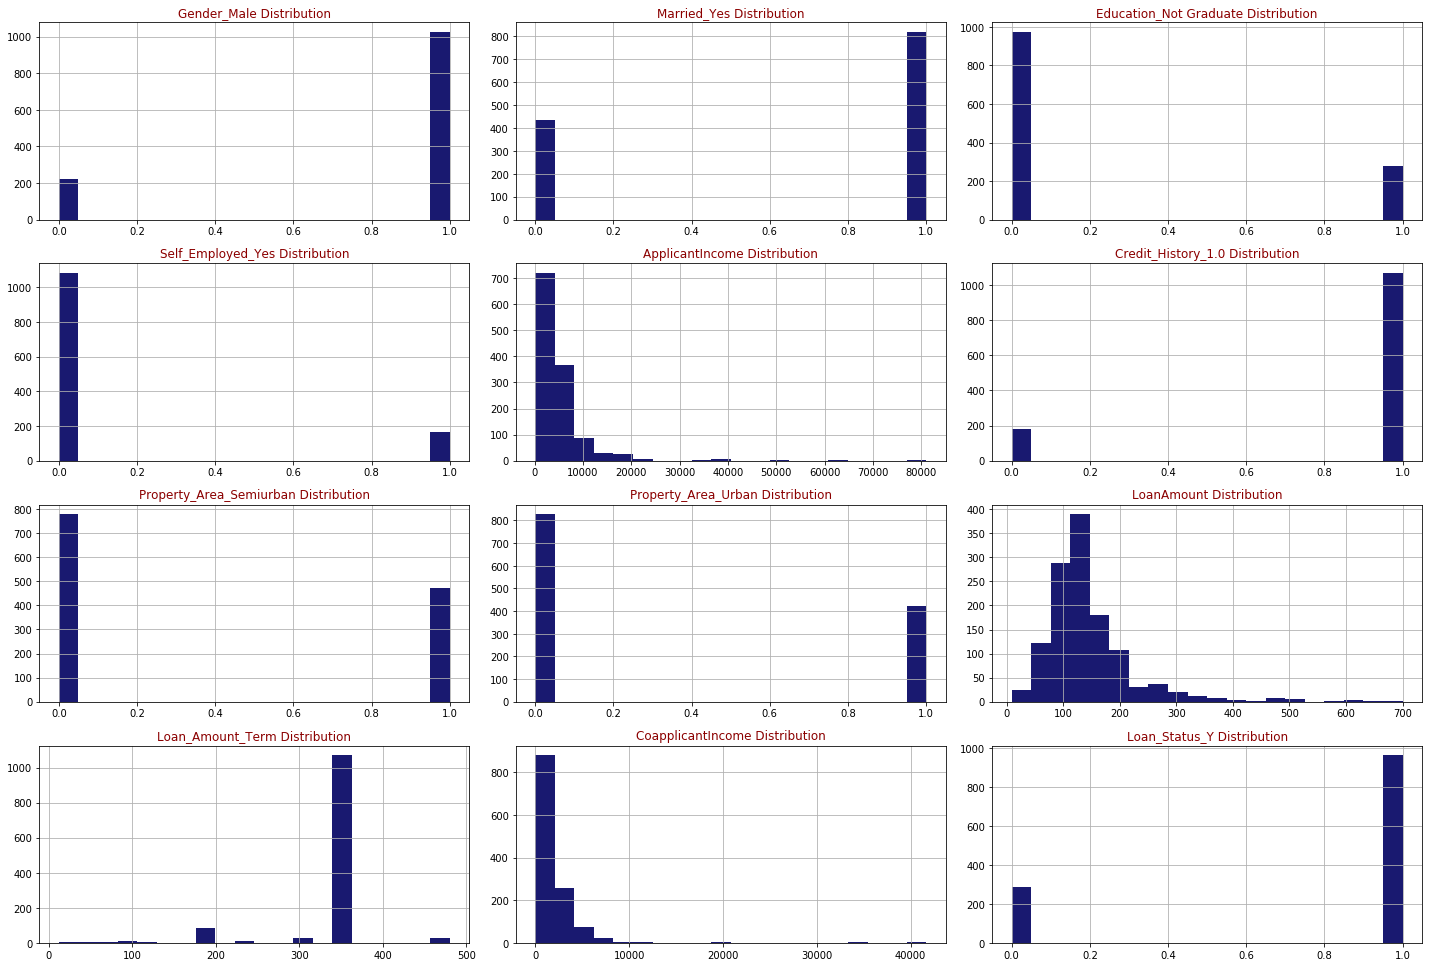

In [49]:
draw_histograms(df1.iloc[0:,0:],df1.iloc[0:,0:].columns,6,3)

In [50]:
df1.Loan_Status_Y.value_counts()

1    965
0    285
Name: Loan_Status_Y, dtype: int64

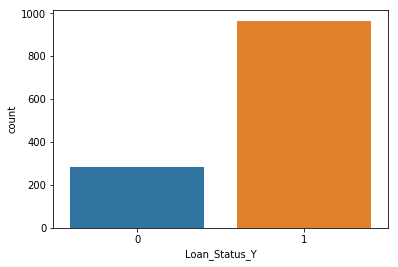

In [51]:
sn.countplot(x='Loan_Status_Y',data=df1)

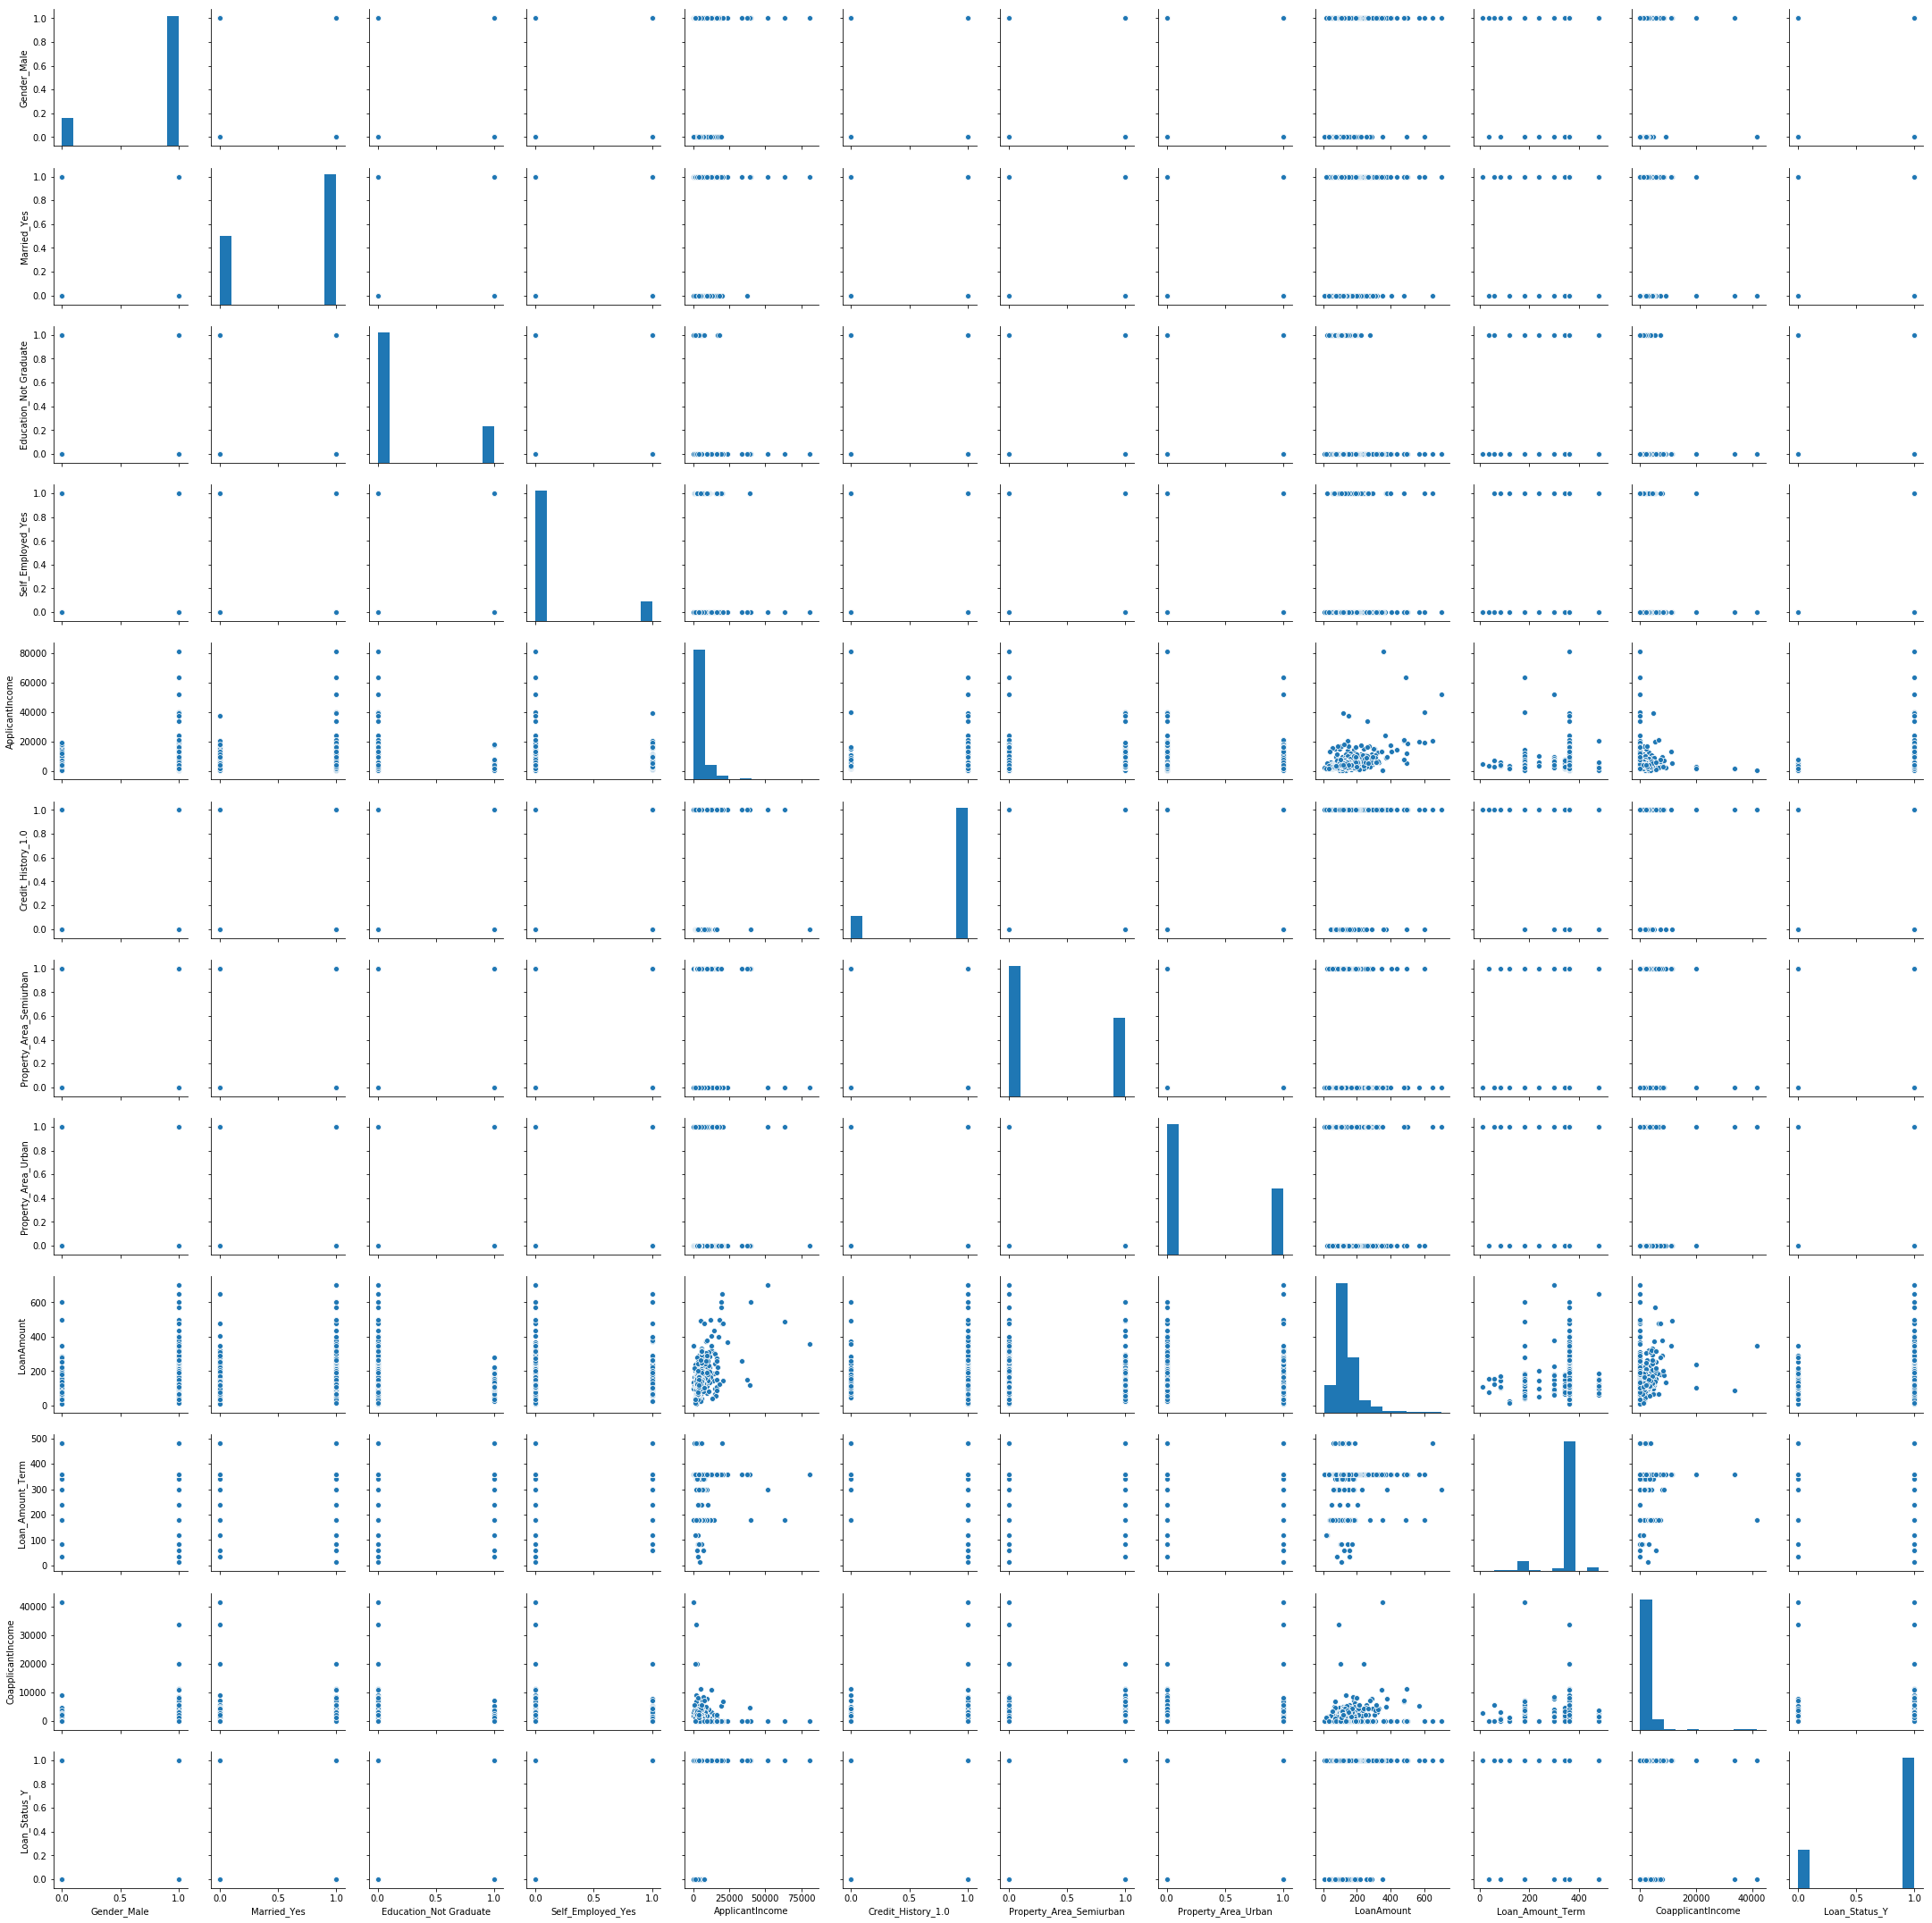

In [52]:
sn.pairplot(data=df1)

In [53]:
df1.describe()

,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,ApplicantIncome,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,LoanAmount,Loan_Amount_Term,CoapplicantIncome,Loan_Status_Y
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,0.820800,0.654400,0.220800,0.132800,5379.020000,0.854400,0.376800,0.336800,146.188382,342.162162,1636.152672,0.772000
std,0.383673,0.475754,0.414952,0.339494,6064.608366,0.352846,0.484778,0.472805,83.834238,64.026940,2923.259188,0.419711
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2873.500000,1.000000,0.000000,0.000000,100.250000,360.000000,0.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,3787.500000,1.000000,0.000000,0.000000,128.000000,360.000000,1213.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5780.000000,1.000000,1.000000,1.000000,163.500000,360.000000,2306.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,1.000000,1.000000,1.000000,700.000000,480.000000,41667.000000,1.000000


# Logistic Regression

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.

In [54]:
from statsmodels.tools import add_constant as add_constant


In [55]:
df1 = add_constant(df1)


C:\Users\ramba\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [56]:
df1.head()

,const,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,ApplicantIncome,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,LoanAmount,Loan_Amount_Term,CoapplicantIncome,Loan_Status_Y
0,1.0,1,0,0,0,5849,1,0,1,146.188382,360.0,0.0,1
1,1.0,1,1,0,0,4583,1,0,0,128.000000,360.0,1508.0,1
2,1.0,1,1,0,1,3000,1,0,1,66.000000,360.0,0.0,1
3,1.0,1,1,1,0,2583,1,0,1,120.000000,360.0,2358.0,0
4,1.0,1,0,0,0,6000,1,0,1,141.000000,360.0,0.0,1


In [57]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df1)
cols=df1.columns[:-1]
model=sm.Logit(df1.Loan_Status_Y,df1[cols])
result=model.fit()
result.summary()


C:\Users\ramba\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\ramba\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\ramba\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


         Current function value: inf
         Iterations: 35


C:\Users\ramba\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Loan_Status_Y   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1238
Method:                           MLE   Df Model:                           11
Date:                Tue, 20 Aug 2019   Pseudo R-squ.:                     inf
Time:                        22:41:58   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.8147      0.669     -4.208      0.000      -4.126      -1.504
Gender_Male                 1.2008      0.237      5.061      0.000       0.736       1.666
Married_Yes                 0.2080      0.202      1.028      0.304      -0.188       0.604
Education_Not Graduate     -2.4110      0.201    -11.995      0.000      -2.805      -2.017
Self_Employed_Yes          21.1547   3709.616      0.006      0.995   -7249.560    7291.869
ApplicantIncome             0.0005    7.7e-05      6.391      0.000       0.000       0.001
Credit_History_1.0          2.2852      0.233      9.827      0.000       1.829       2.741
Property_Area_Semiurban     0.6405      0.217      2.954      0.003       0.215       1.066
Property_Area_Urban         0.3966      0.222      1.785      0.074      -0.039       0.832
LoanAmount                 -0.0030      0.002     -1.283      0.200      -0.007       0.002
Loan_Amount_Term           -0.0008      0.001     -0.597      0.551      -0.004       0.002
CoapplicantIncome         3.58e-05   3.52e-05      1.017      0.309   -3.32e-05       0.000
===========================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



In [59]:
X=df1[['const',
 'Gender_Male',
 'Married_Yes',
 'Education_Not Graduate',
 'Self_Employed_Yes',
 'ApplicantIncome',
 'Credit_History_1.0',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'LoanAmount',
 'Loan_Amount_Term',
 'CoapplicantIncome']]
y=df1['Loan_Status_Y']
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3,random_state=0)

In [60]:
print (X_train.shape)
print (X_test.shape)

(875, 12)
(375, 12)


In [61]:
print (y_train.shape)
print (y_test.shape)

(875,)
(375,)


In [62]:
df1.shape

(1250, 13)

In [63]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\ramba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
print (logreg.intercept_)
print (logreg.coef_)

[-0.28880142]
[[-2.88801420e-01  8.17583916e-01  4.68535007e-01 -2.36498881e+00
   1.50089256e+00  4.21665783e-04  1.70003924e+00  3.89378878e-01
   3.23197310e-01 -2.87386037e-03 -4.29956613e-03  3.17517035e-07]]


In [65]:
print ("Intercept",logreg.intercept_ )


Intercept [-0.28880142]


In [66]:
#print ("Slope",logreg.coef_)
coeff=pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(logreg.coef_.T)], axis=1)
coeff.columns = ("var", "co-eff")


In [67]:
coeff

,var,co-eff
0,const,-2.888014e-01
1,Gender_Male,8.175839e-01
2,Married_Yes,4.685350e-01
3,Education_Not Graduate,-2.364989e+00
4,Self_Employed_Yes,1.500893e+00
5,ApplicantIncome,4.216658e-04
6,Credit_History_1.0,1.700039e+00
7,Property_Area_Semiurban,3.893789e-01
8,Property_Area_Urban,3.231973e-01
9,LoanAmount,-2.873860e-03


In [68]:
np.exp(-2.888014e-01)

0.7491609739988949

In [69]:
coeff['odd(co-eff)'] = np.exp(coeff['co-eff'])
coeff

,var,co-eff,odd(co-eff)
0,const,-2.888014e-01,0.749161
1,Gender_Male,8.175839e-01,2.265021
2,Married_Yes,4.685350e-01,1.597652
3,Education_Not Graduate,-2.364989e+00,0.093950
4,Self_Employed_Yes,1.500893e+00,4.485691
5,ApplicantIncome,4.216658e-04,1.000422
6,Credit_History_1.0,1.700039e+00,5.474162
7,Property_Area_Semiurban,3.893789e-01,1.476064
8,Property_Area_Urban,3.231973e-01,1.381538
9,LoanAmount,-2.873860e-03,0.997130


In [70]:
#Add train data prediction
train_pred = pd.DataFrame(logreg.predict(X_train))
train_pred.columns = ['Pred_results']
train_pred.head()

,Pred_results
0,0
1,1
2,1
3,0
4,0


In [71]:
y_train=y_train.reset_index(drop=True)

In [72]:
pd.concat([y_train,train_pred],axis = 1).head()

,Loan_Status_Y,Pred_results
0,0,0
1,1,1
2,1,1
3,0,0
4,1,0


In [73]:
y_train.shape

(875,)

In [74]:
train_pred.shape

(875, 1)

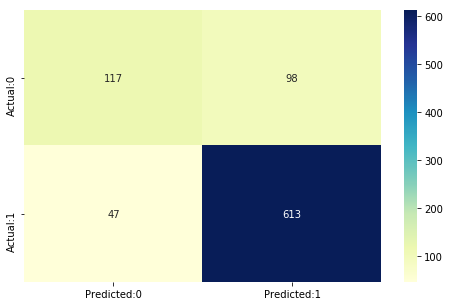

In [75]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,train_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [76]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]


In [77]:
TNR = TN/float(TN+FP)#true negative
TNR

0.5441860465116279

In [78]:
TPR = TP/float(TP+FN)#true positive
TPR

0.9287878787878788

In [79]:
logreg_prob = logreg.predict_proba(X_train)#checking probability
logreg_prob

array([[0.56866857, 0.43133143],
       [0.06264858, 0.93735142],
       [0.05095314, 0.94904686],
       ...,
       [0.0383899 , 0.9616101 ],
       [0.15805667, 0.84194333],
       [0.11473294, 0.88526706]])

In [80]:
logreg_proba1 = np.where(logreg_prob[0:,1]>0.6,1,0)
pd.DataFrame(logreg_proba1).head()

,0
0,0
1,1
2,1
3,0
4,0


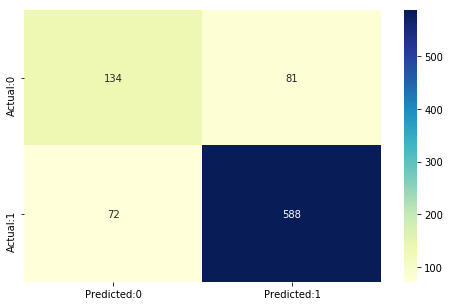

In [81]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,logreg_proba1)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# ROC curve

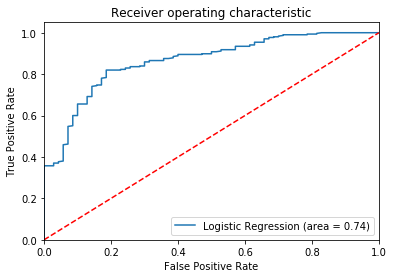

In [82]:
import matplotlib.pyplot as plt 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train,train_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decision tree

In [83]:
from sklearn import tree


In [84]:
dec = tree.DecisionTreeClassifier() #model


In [85]:
dec_fit = dec.fit(X_train,y_train) #fitting


In [86]:
pred_dec_Xtest = dec_fit.predict(X_test)#prediction test
pd.DataFrame(pred_dec_Xtest).head()

,0
0,1
1,1
2,1
3,0
4,0


In [87]:
import sklearn

In [88]:
sklearn.metrics.accuracy_score(y_test,pred_dec_Xtest) #test

0.888

In [89]:
pred_dec1_Xtrain = dec_fit.predict(X_train)#prediction train
pd.DataFrame(pred_dec1_Xtrain).head()

,0
0,0
1,1
2,1
3,0
4,1


In [90]:
sklearn.metrics.accuracy_score(y_train,pred_dec1_Xtrain)#train data

0.9622857142857143

In [91]:
prob_decXtest = dec_fit.predict_proba(X_test)#probability for test
pd.DataFrame(prob_decXtest).head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [92]:
prob_decXtest = np.where(logreg_prob[0:,1]>0.6,1,0)
pd.DataFrame(prob_decXtest).head()

,0
0,0
1,1
2,1
3,0
4,0


In [93]:
prob_decXtrain = dec_fit.predict_proba(X_train)#probability for train
pd.DataFrame(prob_decXtrain).head()

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [94]:
prob_decXtrain = np.where(logreg_prob[0:,1]>0.6,1,0)
pd.DataFrame(prob_decXtrain).head()

,0
0,0
1,1
2,1
3,0
4,0


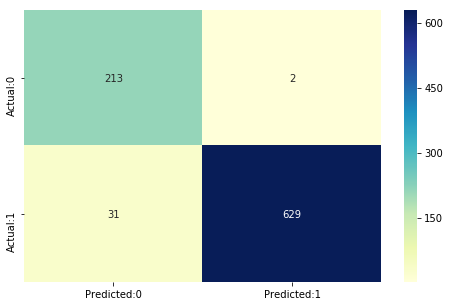

In [95]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,pred_dec1_Xtrain)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [96]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]


In [97]:
TNR = TN/float(TN+FP)#true negative
TNR

0.9906976744186047

In [98]:
TPR = TP/float(TP+FN)#true positive
TPR

0.953030303030303

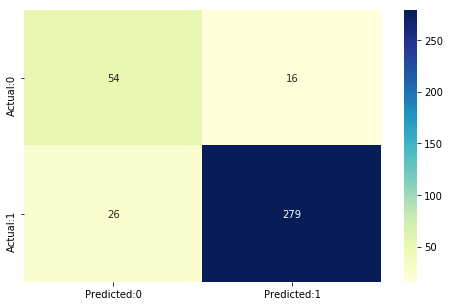

In [99]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_dec_Xtest)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [100]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]


In [101]:
TNR = TN/float(TN+FP)#true negative
TNR

0.7714285714285715

In [102]:
TPR = TP/float(TP+FN)#true positive
TPR

0.9147540983606557

# ROC

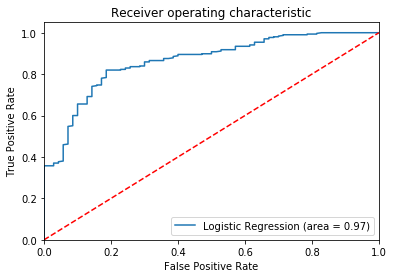

In [103]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train,pred_dec1_Xtrain)
#fpr, tpr, thresholds = roc_curve(y_test, pred_dec_Xtest[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# SVM

In [104]:
prob_pred_dectest = np.where(logreg_prob[0:,1]>0.6,1,0)
pd.DataFrame(prob_pred_dectest).head()

,0
0,0
1,1
2,1
3,0
4,0


In [105]:
from sklearn import svm


In [106]:
support = svm.SVC(gamma='scale',probability=True)

In [107]:
support1 = support.fit(X_train,y_train)

In [108]:
pred_support = support1.predict(X_test)

In [109]:
pred_support_train = support1.predict(X_train)

In [110]:
pred_support

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [111]:
pd.DataFrame(pred_support).head()

,0
0,1
1,1
2,1
3,1
4,1


In [112]:
prob_pred_support = support1.predict_proba(X_test)

In [113]:
cm_svm=confusion_matrix(y_test,pred_support)

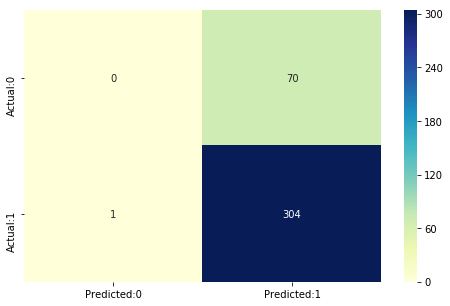

In [114]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_support)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [115]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]


In [116]:
TNR = TN/float(TN+FP)#true negative
TNR

0.0

In [117]:
TPR = TP/float(TP+FN)#true positive
TPR

0.9967213114754099

In [118]:
sklearn.metrics.accuracy_score(y_test,pred_support) #test.

0.8106666666666666

In [119]:
sklearn.metrics.accuracy_score(y_train,pred_support_train) #train.

0.7554285714285714

# Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier


In [121]:
RF = RandomForestClassifier(n_estimators=10)

In [122]:
RF_fit = RF.fit(X_train, y_train)

In [123]:
pred_RF = RF_fit.predict(X_test)

In [124]:
pred_RF_train = RF_fit.predict(X_train)

In [125]:
pd.DataFrame(pred_RF).head()

,0
0,1
1,1
2,1
3,0
4,0


In [126]:
pd.DataFrame(pred_RF_train).head()

,0
0,0
1,1
2,1
3,0
4,1


In [127]:
prob_pred_RF = RF_fit.predict_proba(X_test)

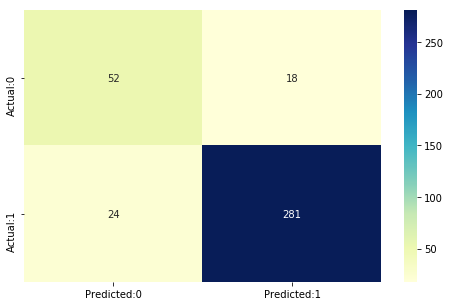

In [128]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_RF)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [129]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]


In [130]:
TNR = TN/float(TN+FP)#true negative
TNR

0.7428571428571429

In [131]:
TPR = TP/float(TP+FN)#true positive
TPR

0.921311475409836

In [132]:
sklearn.metrics.accuracy_score(y_test,pred_RF) #test.

0.888

In [133]:
sklearn.metrics.accuracy_score(y_train,pred_RF_train) #train.

0.9611428571428572

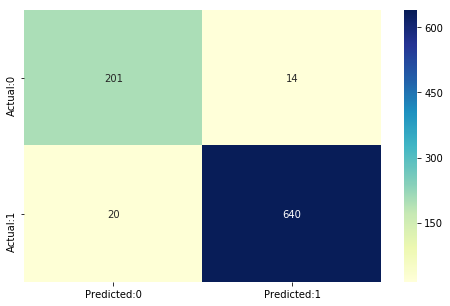

In [134]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,pred_RF_train)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [135]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]


In [136]:
TNR = TN/float(TN+FP)#true negative
TNR

0.9348837209302325

In [137]:
TPR = TP/float(TP+FN)#true positive
TPR

0.9696969696969697

# KNN neighbours

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
KNN = KNeighborsClassifier(n_neighbors=3)

In [140]:
KNN_fit = KNN.fit(X_train, y_train) 

In [141]:
pred_KNN_test= KNN_fit.predict(X_test)

In [142]:
pred_KNN_train = KNN_fit.predict(X_train)

In [143]:
pd.DataFrame(pred_KNN_test).head()

,0
0,0
1,1
2,0
3,1
4,1


In [144]:
pd.DataFrame(pred_KNN_train).head()

,0
0,0
1,1
2,1
3,0
4,1


In [145]:
prob_KNN = KNN_fit.predict_proba(X_test)

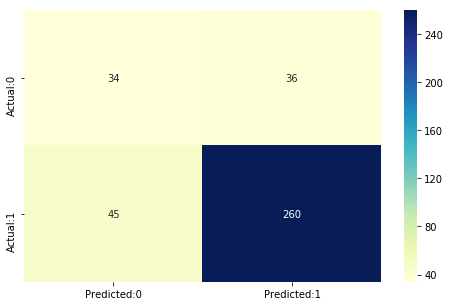

In [146]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_KNN_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [147]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]


In [148]:
TNR = TN/float(TN+FP)#true negative
TNR

0.4857142857142857

In [149]:
TPR = TP/float(TP+FN)#true positive
TPR

0.8524590163934426

In [150]:
sklearn.metrics.accuracy_score(y_test,pred_KNN_test) #test.

0.784

In [151]:
sklearn.metrics.accuracy_score(y_train,pred_KNN_train) #train.

0.904

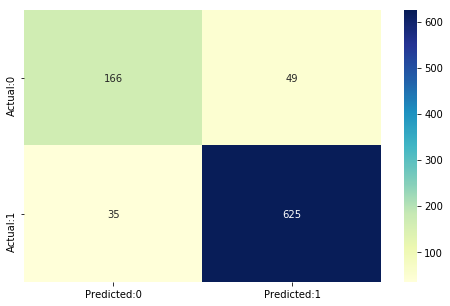

In [152]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,pred_KNN_train)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [153]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]


In [154]:
TNR = TN/float(TN+FP)#true negative
TNR

0.772093023255814

In [155]:
TPR = TP/float(TP+FN)#true positive
TPR

0.946969696969697